<a href="https://colab.research.google.com/github/aditi-123459/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
#Load the Dataset
df = pd.read_csv("Twitter_Data.csv")


In [ ]:
# Step: Initial Dataset Exploration

df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
# Step: Renaming Columns for Consistency

df.rename(columns={
    'clean_text': 'text',
    'category': 'sentiment'
}, inplace=True)


In [ ]:
# Step: Checking for Missing Values

df.isnull().sum()


,0
text,4
sentiment,7


In [ ]:
# Step: Removing Rows with Missing Values

df = df.dropna()


In [ ]:
# Step: Defining Text Cleaning Function

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)   # remove URLs
    text = re.sub(r"@\w+", "", text)      # remove mentions
    text = re.sub(r"#\w+", "", text)      # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text)
    return text


In [ ]:
# Step: Applying Text Cleaning Function

df['text'] = df['text'].apply(clean_text)


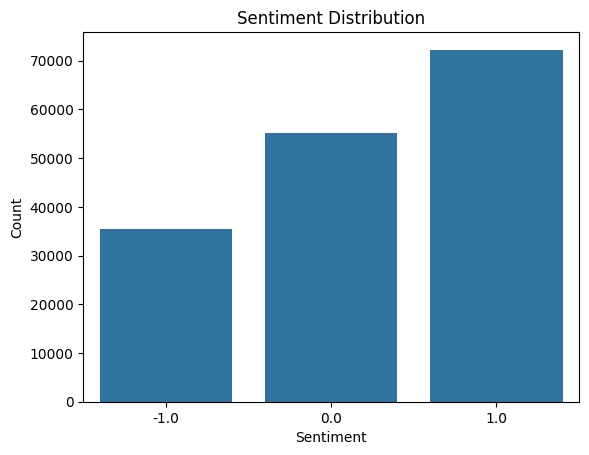

In [ ]:
# Step: Visualizing Sentiment Distribution

sns.countplot(x=df['sentiment'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [ ]:
# Step: Splitting Dataset into Training and Testing Sets

X = df['text']
y = df['sentiment']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
 # Step: Feature Extraction using TF-IDF and Model Training using Naive Bayes


tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
# Step: Model Evaluation – Accuracy Calculation

y_pred = model.predict(X_test_tfidf)


In [ ]:
accuracy_score(y_test, y_pred)


0.7364852426827023

In [ ]:
# Step: Detailed Model Evaluation using Classification Report and Confusion Matrix

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        -1.0       0.91      0.42      0.57      7152
         0.0       0.88      0.66      0.76     11067
         1.0       0.65      0.95      0.77     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



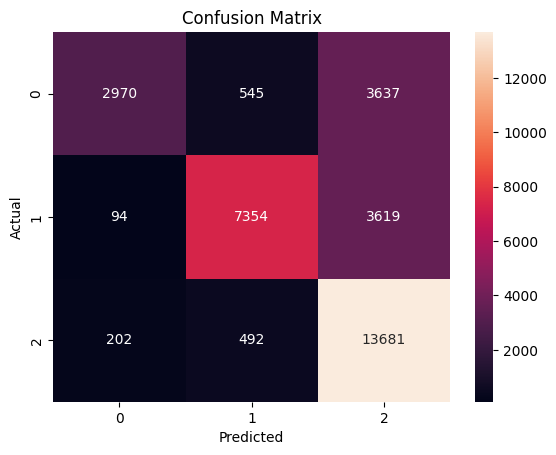

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Step: Testing Model on New Samples and Exporting Predictions

sample = ["I love this product", "This is the worst experience ever"]
sample_tfidf = tfidf.transform(sample)
model.predict(sample_tfidf)


array([ 1., -1.])

In [ ]:
df['Predicted_Sentiment'] = model.predict(tfidf.transform(df['text']))
df.to_csv("sentiment_analysis_output.csv", index=False)
